In [138]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model , Parameters

In [71]:
path="/afs/crc.nd.edu/user/h/hbhattar/Hemanta/metals/ThermalConductivity/EqulibratedSystem/RotationDiffusion/"

In [72]:
folder = "MNWN"

In [73]:
f = pd.read_csv(path+folder+"/"+"MNWN_Dynamics_New_1.lcorr",delimiter="\t",skiprows=6, names=['t','lx','ly','lz','nope'])
f=f.dropna(axis=1)
f.head()

,t,lx,ly,lz
0,0,1.000000,1.000000,1.000000
1,10,0.973330,0.985489,0.975976
2,20,0.925759,0.954637,0.934464
3,30,0.900877,0.930206,0.916414
4,40,0.898741,0.922405,0.920204


In [74]:
g = pd.read_csv(path+folder+"/"+"MNWN_Dynamics_New_2.lcorr",delimiter="\t",skiprows=6, names=['t','lx','ly','lz','nope'])
g=g.dropna(axis=1)

In [75]:
g.head()

,t,lx,ly,lz
0,0,1.000000,1.000000,1.000000
1,10,0.973499,0.985593,0.976130
2,20,0.926294,0.954984,0.934950
3,30,0.901747,0.930809,0.917192
4,40,0.899812,0.923195,0.921126


In [176]:



def MeanStdErr(path,folder):
    fullPath = path + folder+"/"
    f=pd.DataFrame()
    lx=pd.DataFrame()
    ly=pd.DataFrame()
    lz=pd.DataFrame()
    t = pd.DataFrame()
    listdf=[]
    for index in range(1,6):
        g=pd.read_csv(fullPath+folder+"_Dynamics_New_%d.lcorr"%(index),delimiter="\t",\
                      skiprows=6, names=['t','lx','ly','lz','nope'])
        g=g.dropna(axis=1)
        t["t"] = g["t"]
        lx["lx%d"%(index)] = g["lx"]
        ly["ly%d"%(index)] = g["ly"]
        lz["lz%d"%(index)] = g["lz"]
    f['t'] = t["t"]
    
    f["lxM"] = lx.mean(axis=1)
    f["lxStd"] = lx.std(axis=1) * (1.96/np.sqrt(5))
    f["lyM"] = ly.mean(axis=1)
    f["lyStd"] = ly.std(axis=1) * (1.96/np.sqrt(5))
    f["lzM"] = lz.mean(axis=1)
    f["lzStd"] = lz.std(axis=1) * (1.96/np.sqrt(5))
    return f

#def Print(system, diffusion, coeff):
    print("System: %s\tRotation : %s\t tau: %f ps \t Diffusion constant: %f ps$^{-1}$"\
          %(system, diffusion, coeff/1000, 1000/(2*coeff)))

def Print(system, diffusion, coeff):
    print("System: " + system + ":: tau", coeff)
    
def logTransform(x):
    return np.log(x)

def identity(x):
    return x

def linear(t,a,tau):
    __name__ = "Linear :a - t/tau"
    return a - t/tau

def exp (x, A, tau):
    __name__ = "Exponential :A*np.exp(-t/tau)"
    
    return A*np.exp(-x/tau)

def multiple_exp3 (t, A, tauA, B, tauB, C, tauC):
    __name__ = "Exponential_Multiple:: A*np.exp(-t/tauA) +\n B * np.exp(-t/tauB) +\n C * np.exp(-t/tauC) + \n(1 - A - B - C)"
    return A*np.exp(-t/tauA) + B * np.exp(-t/tauB) + C * np.exp(-t/tauC) + (1 - A - B - C)


def multiple_exp2 (t, A, tauA, B, tauB):
    __name__ = "Exponential_Multiple:: A*np.exp(-t/tauA) +\n B * np.exp(-t/tauB) + \n(1 - A - B )"
    return A*np.exp(-t/tauA) + B * np.exp(-t/tauB)  + (1 - A - B )

def linearPlot(t,coeff):
    __name__ = "Linear :a - t/tau"
    [a, tau] = coeff
    return a - t/tau

def expPlot (x, coeff):
    __name__ = "Exponential :A*np.exp(-t/tau)"
    [A, tau] = coeff
    return A*np.exp(-x/tau)

def multiple_exp3Plot (t, coeff):
    __name__ = "Exponential_Multiple:: A*np.exp(-t/tauA) +\n B * np.exp(-t/tauB) +\n C * np.exp(-t/tauC) + \n(1 - A - B - C)"
    [A, tauA, B, tauB, C, tauC] = coeff
    return A*np.exp(-t/tauA) + B * np.exp(-t/tauB) + C * np.exp(-t/tauC) + (1 - A - B - C)

def multiple_exp2Plot (t, coeff):
    [A, tauA, B, tauB] = coeff
    __name__ = "Exponential_Multiple:: A*np.exp(-t/tauA) +\n B * np.exp(-t/tauB) + \n(1 - A - B )"
    return A*np.exp(-t/tauA) + B * np.exp(-t/tauB)  + (1 - A - B )

In [156]:
systems = ["MNWN",
           "MFWN",
           "MNWF",
           "MFWF",
           "MNWN_TIP4P",
           "MFWN_TIP4P",
                
          ]
dfDict={}
for system in systems:
    named_df = MeanStdErr(path,system)
    dfDict[system] = named_df


In [157]:
dfDict.keys()

dict_keys(['MNWN', 'MFWN', 'MNWF', 'MFWF', 'MNWN_TIP4P', 'MFWN_TIP4P'])

In [113]:
dfDict["MNWN"].head()

,t,lxM,lxStd,lyM,lyStd,lzM,lzStd
0,0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,10,0.973412,0.000067,0.985540,0.000039,0.976048,0.000060
2,20,0.926015,0.000209,0.954803,0.000132,0.934686,0.000185
3,30,0.901284,0.000336,0.930488,0.000232,0.916757,0.000290
4,40,0.899227,0.000418,0.922762,0.000310,0.920595,0.000345


[8.26003221e-01 3.80692193e+03] 0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
Name: t, dtype: int64 0    0.826003
1    0.823836
2    0.821675
3    0.819520
4    0.817370
5    0.815225
6    0.813087
7    0.810954
8    0.808826
9    0.806705
Name: t, dtype: float64


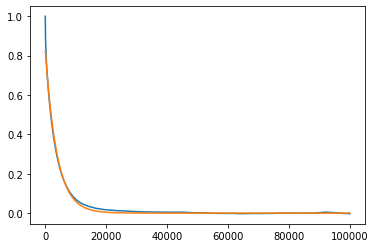

In [114]:
c,v=curve_fit(exp,dfDict["MNWN"].t,dfDict["MNWN"].lxM)
plt.plot(dfDict["MNWN"].t,dfDict["MNWN"].lxM)
plt.plot(dfDict["MNWN"].t,exp(dfDict["MNWN"].t, c[0], c[1]))
print(c,dfDict["MNWN"].t[:10],exp(dfDict["MNWN"].t, c[0], c[1])[:10])

System: MNWN:: tau 3816.4977229445553
System: MFWN:: tau 3554.3758572303154
System: MNWN:: tau 5462.668108243294
System: MFWN:: tau 5078.0803786439565
System: MNWN:: tau 6830.4805571290635
System: MFWN:: tau 6193.990398403803


(0, 1)

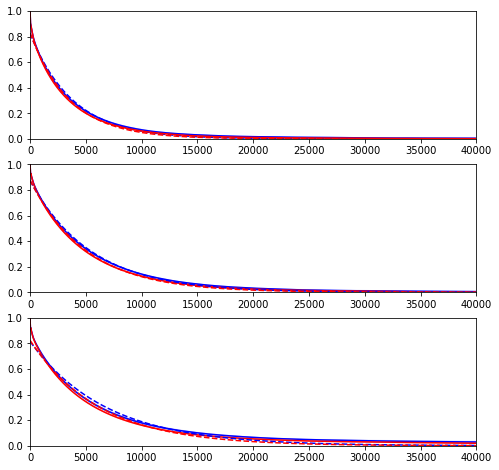

In [120]:
sys1 = "MNWN"
sys2 = "MFWN"
fit_window = [0,40000]
xlim = [0,40000]
ylim = [0,1]




labels=[sys1,sys2]
colors = {sys1:"blue", sys2:"red"}
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(3,1,1)
ax1.plot(dfDict[sys1].t,dfDict[sys1].lxM,color=colors[sys1])
ax1.fill_between(dfDict[sys1].t, dfDict[sys1].lxM - dfDict[sys1].lxStd, \
                 dfDict[sys1].lxM + dfDict[sys1].lxStd,alpha=0.2, color=colors[sys1])

pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
coeff1,cov = curve_fit(exp,dfDict[sys1].t[pos1],dfDict[sys1].lxM[pos1] )
Print(sys1,"X",coeff1[1])
ax1.plot(dfDict[sys1].t,exp(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")



ax1.plot(dfDict[sys2].t,dfDict[sys2].lxM, color=colors[sys2])
ax1.fill_between(dfDict[sys2].t, dfDict[sys2].lxM - dfDict[sys2].lxStd, \
                 dfDict[sys2].lxM + dfDict[sys2].lxStd,alpha=0.2, color=colors[sys2])

pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
coeff2,cov = curve_fit(exp,dfDict[sys2].t[pos2],dfDict[sys2].lxM[pos2] )
Print(sys2,"X",coeff2[1])
ax1.plot(dfDict[sys2].t,exp(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)




ax2 = fig.add_subplot(3,1,2)
ax2.plot(dfDict[sys1].t,dfDict[sys1].lyM,color=colors[sys1])
ax2.fill_between(dfDict[sys1].t, dfDict[sys1].lyM - dfDict[sys1].lyStd, \
                 dfDict[sys1].lyM + dfDict[sys1].lyStd,alpha=0.2, color=colors[sys1])

ax2.plot(dfDict[sys2].t,dfDict[sys2].lyM, color=colors[sys2])
ax2.fill_between(dfDict[sys2].t, dfDict[sys2].lyM - dfDict[sys2].lyStd, \
                 dfDict[sys2].lyM + dfDict[sys2].lyStd,alpha=0.2, color=colors[sys2])



pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
coeff1,cov = curve_fit(exp,dfDict[sys1].t[pos1],dfDict[sys1].lyM[pos1] )
Print(sys1,"Y",coeff1[1])
ax2.plot(dfDict[sys1].t,exp(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")

pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
coeff2,cov = curve_fit(exp,dfDict[sys2].t[pos2],dfDict[sys2].lyM[pos2] )
Print(sys2,"Y",coeff2[1])
ax2.plot(dfDict[sys2].t,exp(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)




ax3 = fig.add_subplot(3,1,3)
ax3.plot(dfDict[sys1].t,dfDict[sys1].lzM,color=colors[sys1])
ax3.fill_between(dfDict[sys1].t, dfDict[sys1].lzM - dfDict[sys1].lzStd, \
                 dfDict[sys1].lzM + dfDict[sys1].lzStd,alpha=0.2, color=colors[sys1])

ax3.plot(dfDict[sys2].t,dfDict[sys2].lzM, color=colors[sys2])
ax3.fill_between(dfDict[sys2].t, dfDict[sys2].lzM - dfDict[sys2].lzStd, \
                 dfDict[sys2].lzM + dfDict[sys2].lzStd,alpha=0.2, color=colors[sys2])


pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
coeff1,cov = curve_fit(exp,dfDict[sys1].t[pos1],dfDict[sys1].lzM[pos1] )
Print(sys1,"Z",coeff1[1])
ax3.plot(dfDict[sys1].t,exp(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")

pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
coeff2,cov = curve_fit(exp,dfDict[sys2].t[pos2],dfDict[sys2].lzM[pos2] )
Print(sys2,"Y",coeff2[1])
ax3.plot(dfDict[sys2].t,exp(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")

ax3.set_xlim(xlim)
ax3.set_ylim(ylim)

System: MNWF:: tau 3345.2695160117414
System: MFWF:: tau 3121.430154671906
System: MNWF:: tau 4842.970058632719
System: MFWF:: tau 4540.208941822901
System: MNWF:: tau 4965.019099757834
System: MFWF:: tau 4621.3254399462485


(0, 1)

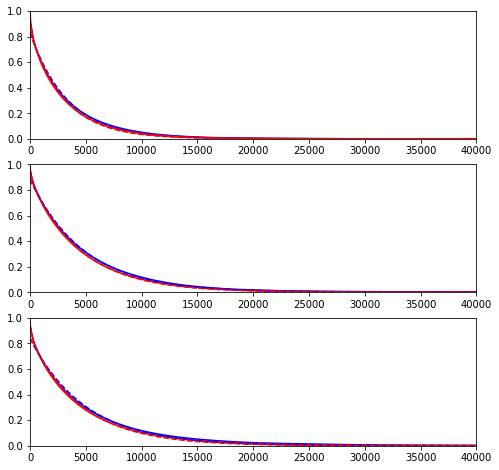

In [46]:
sys1 = "MNWF"
sys2 = "MFWF"
fit_window = [0,40000]
xlim = [0,40000]
ylim = [0,1]




labels=[sys1,sys2]
colors = {sys1:"blue", sys2:"red"}
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(3,1,1)
ax1.plot(dfDict[sys1].t,dfDict[sys1].lxM,color=colors[sys1])
ax1.fill_between(dfDict[sys1].t, dfDict[sys1].lxM - dfDict[sys1].lxStd, \
                 dfDict[sys1].lxM + dfDict[sys1].lxStd,alpha=0.2, color=colors[sys1])

pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
coeff1,cov = curve_fit(exp,dfDict[sys1].t[pos1],dfDict[sys1].lxM[pos1] )
Print(sys1,"X",coeff1[1])
ax1.plot(dfDict[sys1].t,exp(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")



ax1.plot(dfDict[sys2].t,dfDict[sys2].lxM, color=colors[sys2])
ax1.fill_between(dfDict[sys2].t, dfDict[sys2].lxM - dfDict[sys2].lxStd, \
                 dfDict[sys2].lxM + dfDict[sys2].lxStd,alpha=0.2, color=colors[sys2])

pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
coeff2,cov = curve_fit(exp,dfDict[sys2].t[pos2],dfDict[sys2].lxM[pos2] )
Print(sys2,"X",coeff2[1])
ax1.plot(dfDict[sys2].t,exp(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)




ax2 = fig.add_subplot(3,1,2)
ax2.plot(dfDict[sys1].t,dfDict[sys1].lyM,color=colors[sys1])
ax2.fill_between(dfDict[sys1].t, dfDict[sys1].lyM - dfDict[sys1].lyStd, \
                 dfDict[sys1].lyM + dfDict[sys1].lyStd,alpha=0.2, color=colors[sys1])

ax2.plot(dfDict[sys2].t,dfDict[sys2].lyM, color=colors[sys2])
ax2.fill_between(dfDict[sys2].t, dfDict[sys2].lyM - dfDict[sys2].lyStd, \
                 dfDict[sys2].lyM + dfDict[sys2].lyStd,alpha=0.2, color=colors[sys2])



pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
coeff1,cov = curve_fit(exp,dfDict[sys1].t[pos1],dfDict[sys1].lyM[pos1] )
Print(sys1,"Y",coeff1[1])
ax2.plot(dfDict[sys1].t,exp(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")

pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
coeff2,cov = curve_fit(exp,dfDict[sys2].t[pos2],dfDict[sys2].lyM[pos2] )
Print(sys2,"Y",coeff2[1])
ax2.plot(dfDict[sys2].t,exp(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)




ax3 = fig.add_subplot(3,1,3)
ax3.plot(dfDict[sys1].t,dfDict[sys1].lzM,color=colors[sys1])
ax3.fill_between(dfDict[sys1].t, dfDict[sys1].lzM - dfDict[sys1].lzStd, \
                 dfDict[sys1].lzM + dfDict[sys1].lzStd,alpha=0.2, color=colors[sys1])

ax3.plot(dfDict[sys2].t,dfDict[sys2].lzM, color=colors[sys2])
ax3.fill_between(dfDict[sys2].t, dfDict[sys2].lzM - dfDict[sys2].lzStd, \
                 dfDict[sys2].lzM + dfDict[sys2].lzStd,alpha=0.2, color=colors[sys2])


pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
coeff1,cov = curve_fit(exp,dfDict[sys1].t[pos1],dfDict[sys1].lzM[pos1] )
Print(sys1,"Z",coeff1[1])
ax3.plot(dfDict[sys1].t,exp(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")

pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
coeff2,cov = curve_fit(exp,dfDict[sys2].t[pos2],dfDict[sys2].lzM[pos2] )
Print(sys2,"Z",coeff2[1])
ax3.plot(dfDict[sys2].t,exp(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")

ax3.set_xlim(xlim)
ax3.set_ylim(ylim)

System: MNWN_TIP4P:: tau 2798.9104251829262
System: MFWN_TIP4P:: tau 2785.6183626230304
System: MNWN_TIP4P:: tau 3983.125798220886
System: MFWN_TIP4P:: tau 3968.587947601273
System: MNWN_TIP4P:: tau 4038.7089250959716
System: MFWN_TIP4P:: tau 3968.424948750023


(0, 1)

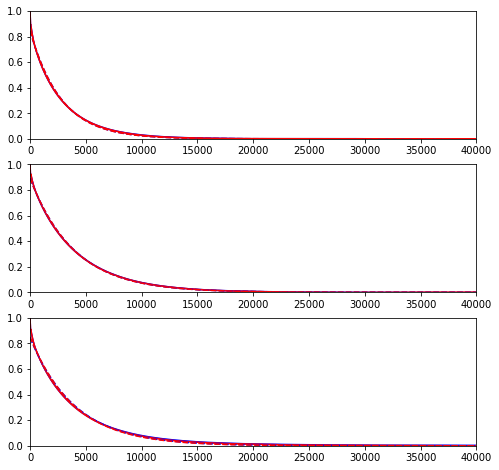

In [47]:
sys1 = "MNWN_TIP4P"
sys2 = "MFWN_TIP4P"
fit_window = [0,40000]
xlim = [0,40000]
ylim = [0,1]




labels=[sys1,sys2]
colors = {sys1:"blue", sys2:"red"}
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(3,1,1)
ax1.plot(dfDict[sys1].t,dfDict[sys1].lxM,color=colors[sys1])
ax1.fill_between(dfDict[sys1].t, dfDict[sys1].lxM - dfDict[sys1].lxStd, \
                 dfDict[sys1].lxM + dfDict[sys1].lxStd,alpha=0.2, color=colors[sys1])

pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
coeff1,cov = curve_fit(exp,dfDict[sys1].t[pos1],dfDict[sys1].lxM[pos1] )
Print(sys1,"X",coeff1[1])
ax1.plot(dfDict[sys1].t,exp(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")



ax1.plot(dfDict[sys2].t,dfDict[sys2].lxM, color=colors[sys2])
ax1.fill_between(dfDict[sys2].t, dfDict[sys2].lxM - dfDict[sys2].lxStd, \
                 dfDict[sys2].lxM + dfDict[sys2].lxStd,alpha=0.2, color=colors[sys2])

pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
coeff2,cov = curve_fit(exp,dfDict[sys2].t[pos2],dfDict[sys2].lxM[pos2] )
Print(sys2,"X",coeff2[1])
ax1.plot(dfDict[sys2].t,exp(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)




ax2 = fig.add_subplot(3,1,2)
ax2.plot(dfDict[sys1].t,dfDict[sys1].lyM,color=colors[sys1])
ax2.fill_between(dfDict[sys1].t, dfDict[sys1].lyM - dfDict[sys1].lyStd, \
                 dfDict[sys1].lyM + dfDict[sys1].lyStd,alpha=0.2, color=colors[sys1])

ax2.plot(dfDict[sys2].t,dfDict[sys2].lyM, color=colors[sys2])
ax2.fill_between(dfDict[sys2].t, dfDict[sys2].lyM - dfDict[sys2].lyStd, \
                 dfDict[sys2].lyM + dfDict[sys2].lyStd,alpha=0.2, color=colors[sys2])



pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
coeff1,cov = curve_fit(exp,dfDict[sys1].t[pos1],dfDict[sys1].lyM[pos1] )
Print(sys1,"Y",coeff1[1])
ax2.plot(dfDict[sys1].t,exp(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")

pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
coeff2,cov = curve_fit(exp,dfDict[sys2].t[pos2],dfDict[sys2].lyM[pos2] )
Print(sys2,"Y",coeff2[1])
ax2.plot(dfDict[sys2].t,exp(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)




ax3 = fig.add_subplot(3,1,3)
ax3.plot(dfDict[sys1].t,dfDict[sys1].lzM,color=colors[sys1])
ax3.fill_between(dfDict[sys1].t, dfDict[sys1].lzM - dfDict[sys1].lzStd, \
                 dfDict[sys1].lzM + dfDict[sys1].lzStd,alpha=0.2, color=colors[sys1])

ax3.plot(dfDict[sys2].t,dfDict[sys2].lzM, color=colors[sys2])
ax3.fill_between(dfDict[sys2].t, dfDict[sys2].lzM - dfDict[sys2].lzStd, \
                 dfDict[sys2].lzM + dfDict[sys2].lzStd,alpha=0.2, color=colors[sys2])


pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
coeff1,cov = curve_fit(exp,dfDict[sys1].t[pos1],dfDict[sys1].lzM[pos1] )
Print(sys1,"Z",coeff1[1])
ax3.plot(dfDict[sys1].t,exp(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")

pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
coeff2,cov = curve_fit(exp,dfDict[sys2].t[pos2],dfDict[sys2].lzM[pos2] )
Print(sys2,"Z",coeff2[1])
ax3.plot(dfDict[sys2].t,exp(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")

ax3.set_xlim(xlim)
ax3.set_ylim(ylim)

(-4, 0)

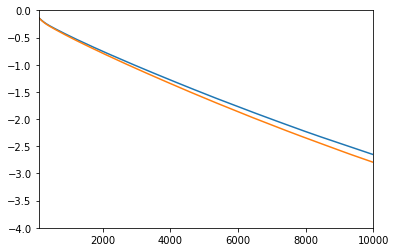

In [48]:
plt.plot(dfDict["MNWN"].t, np.log(dfDict["MNWN"].lxM))
plt.plot(dfDict["MFWN"].t, np.log(dfDict["MFWN"].lxM))
plt.xlim(100,10000)
plt.ylim([-4,0])

In [174]:
def TransformRotDiff(syslist, fit_window, xlim, ylim, transform_function, fit_function, fit_functionPlot):
    print(syslist)


    print("Fit Function: ",fit_function.__name__)
    print("Transform Function:", transform_function.__name__)
    [sys1,sys2] = syslist

    tf = transform_function
    ff = fit_function
    ffPlot = fit_functionPlot


    labels=[sys1,sys2]
    colors = {sys1:"blue", sys2:"red"}
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(3,1,1)
    ax1.set_title("Fit Fx: %s || Transform Fx: %s"%(fit_function.__name__,transform_function.__name__))
    ax1.plot(dfDict[sys1].t,tf(dfDict[sys1].lxM),color=colors[sys1])
    pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
    try:
        coeff1,cov = curve_fit(ff,dfDict[sys1].t[pos1],tf(dfDict[sys1].lxM[pos1]) )
        Print(sys1,"X",coeff1)
    
    #ax1.plot(dfDict[sys1].t,ff(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")
        ax1.plot(dfDict[sys1].t,ffPlot(dfDict[sys1].t,coeff1),color=colors[sys1],linestyle="dashed")
    
    except:
        print("Error")

    ax1.plot(dfDict[sys2].t,tf(dfDict[sys2].lxM), color=colors[sys2])


    pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
    try:
        coeff2,cov = curve_fit(ff,dfDict[sys2].t[pos2],tf(dfDict[sys2].lxM[pos2]) )
        Print(sys2,"X",coeff2)
        #ax1.plot(dfDict[sys2].t,ff(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")
        ax1.plot(dfDict[sys2].t,ffPlot(dfDict[sys2].t,coeff2),color=colors[sys2],linestyle="dashed")
    except: 
        print("Error")
        
    ax1.set_xlim(xlim)
    ax1.set_ylim(ylim)
    ax1.set_xlabel("t")
    ax1.set_ylabel("Lcorr_x")




    ax2 = fig.add_subplot(3,1,2)
    ax2.plot(dfDict[sys1].t,tf(dfDict[sys1].lyM),color=colors[sys1])
    pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
    try:
        coeff1,cov = curve_fit(ff,dfDict[sys1].t[pos1],tf(dfDict[sys1].lyM[pos1]) )
        Print(sys1,"Y",coeff1)
        #ax2.plot(dfDict[sys1].t,ff(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")
        ax2.plot(dfDict[sys1].t,ffPlot(dfDict[sys1].t,coeff1),color=colors[sys1],linestyle="dashed")
    except:
        print("Error")


    ax2.plot(dfDict[sys2].t,tf(dfDict[sys2].lyM), color=colors[sys2])


    pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
    try:
        coeff2,cov = curve_fit(ff,dfDict[sys2].t[pos2],tf(dfDict[sys2].lyM[pos2]) )
        Print(sys2,"Y",coeff2)
        #ax2.plot(dfDict[sys2].t,ff(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")
        ax2.plot(dfDict[sys2].t,ffPlot(dfDict[sys2].t,coeff2),color=colors[sys2],linestyle="dashed")
    except:
        print("Error")

    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2.set_xlabel("t")
    ax2.set_ylabel("Lcorr_y")
    




    ax3 = fig.add_subplot(3,1,3)
    ax3.plot(dfDict[sys1].t,tf(dfDict[sys1].lzM),color=colors[sys1])
    pos1 = np.logical_and(dfDict[sys1].t>fit_window[0],dfDict[sys1].t<fit_window[1])
    try:
        coeff1,cov = curve_fit(ff,dfDict[sys1].t[pos1],tf(dfDict[sys1].lzM[pos1]) )
        Print(sys1,"Z",coeff1)
        #ax3.plot(dfDict[sys1].t,ff(dfDict[sys1].t,coeff1[0],coeff1[1]),color=colors[sys1],linestyle="dashed")
        ax3.plot(dfDict[sys1].t,ffPlot(dfDict[sys1].t,coeff1),color=colors[sys1],linestyle="dashed")
    except:
        print("Error")


    ax3.plot(dfDict[sys2].t,tf(dfDict[sys2].lzM), color=colors[sys2])


    pos2 = np.logical_and(dfDict[sys2].t>fit_window[0],dfDict[sys2].t<fit_window[1])
    try:
        coeff2,cov = curve_fit(ff,dfDict[sys2].t[pos2],tf(dfDict[sys2].lzM[pos2]) )
        Print(sys2,"Z",coeff2)
        #ax3.plot(dfDict[sys2].t,ff(dfDict[sys2].t,coeff2[0],coeff2[1]),color=colors[sys2],linestyle="dashed")
        ax3.plot(dfDict[sys2].t,ffPlot(dfDict[sys2].t,coeff2),color=colors[sys2],linestyle="dashed")
    except:
        print("Error")
    ax3.set_xlim(xlim)
    ax3.set_ylim(ylim)
    ax3.set_xlabel("t")
    ax3.set_ylabel("Lcorr_z")
    

['MNWN', 'MFWN']
Fit Function:  exp
Transform Function: identity
System: MNWN:: tau [8.24048606e-01 3.81649772e+03]
System: MFWN:: tau [8.27246442e-01 3.55437586e+03]
System: MNWN:: tau [8.72814600e-01 5.46266811e+03]
System: MFWN:: tau [8.75205030e-01 5.07808038e+03]
System: MNWN:: tau [8.15339175e-01 6.83048056e+03]
System: MFWN:: tau [8.24342634e-01 6.19399040e+03]
++++++++++++++++++
['MNWN', 'MFWN']
Fit Function:  linear
Transform Function: logTransform
System: MNWN:: tau [-2.49666901e-01  4.02801810e+03]
System: MFWN:: tau [-2.57228376e-01  3.81431124e+03]
System: MNWN:: tau [-1.45090195e-01  5.44832943e+03]
System: MFWN:: tau [-1.47968996e-01  5.11481561e+03]
System: MNWN:: tau [-1.82355791e-01  6.27633140e+03]
System: MFWN:: tau [-1.87464866e-01  5.89626622e+03]


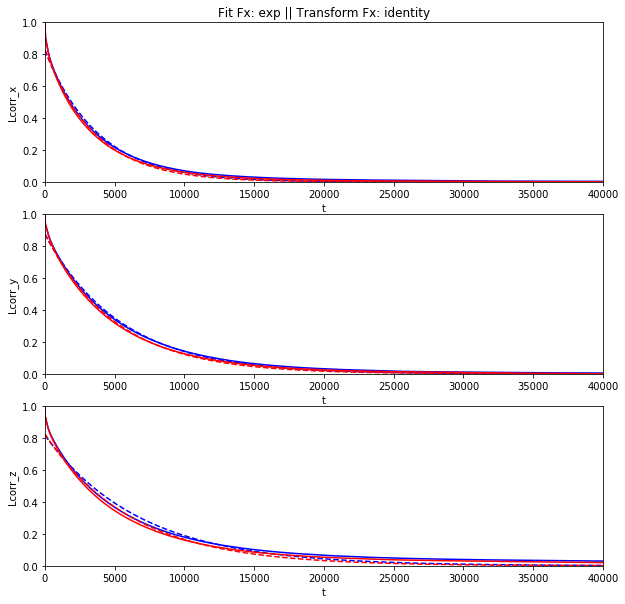

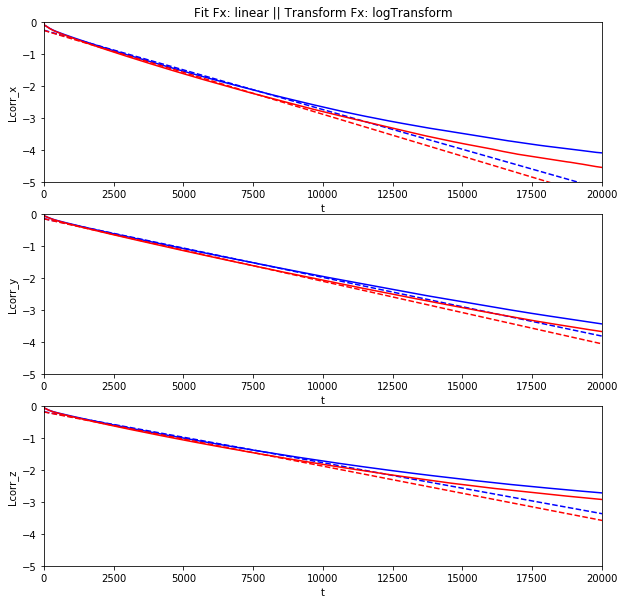

In [171]:
TransformRotDiff(["MNWN","MFWN"], fit_window = [0,40000],xlim = [0,40000],ylim = [0,1],\
                 transform_function=identity, fit_function=exp, fit_functionPlot=expPlot )
print("++++++++++++++++++")
TransformRotDiff(["MNWN","MFWN"], fit_window = [0,10000],xlim = [0,20000],\
                 ylim = [-5,0], transform_function=logTransform, fit_function=linear, fit_functionPlot = linearPlot )

['MNWN', 'MFWN']
Fit Function:  exp
Transform Function: identity
System: MNWN:: tau [8.24048606e-01 3.81649772e+03]
System: MFWN:: tau [8.27246442e-01 3.55437586e+03]
System: MNWN:: tau [8.72814600e-01 5.46266811e+03]
System: MFWN:: tau [8.75205030e-01 5.07808038e+03]
System: MNWN:: tau [8.15339175e-01 6.83048056e+03]
System: MFWN:: tau [8.24342634e-01 6.19399040e+03]
++++++++++++++++++
['MNWN', 'MFWN']
Fit Function:  linear
Transform Function: logTransform
System: MNWN:: tau [-2.49666901e-01  4.02801810e+03]
System: MFWN:: tau [-2.57228376e-01  3.81431124e+03]
System: MNWN:: tau [-1.45090195e-01  5.44832943e+03]
System: MFWN:: tau [-1.47968996e-01  5.11481561e+03]
System: MNWN:: tau [-1.82355791e-01  6.27633140e+03]
System: MFWN:: tau [-1.87464866e-01  5.89626622e+03]


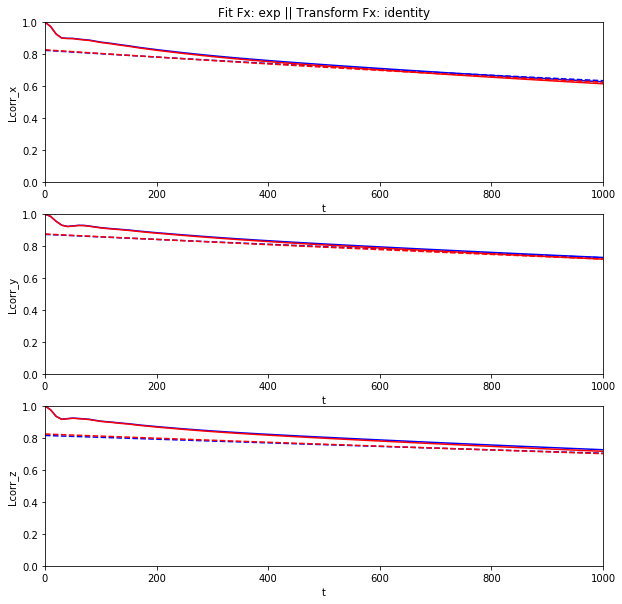

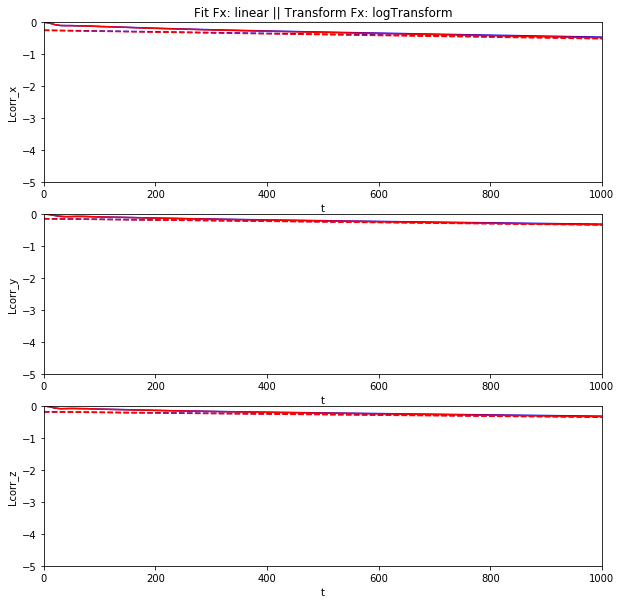

In [172]:
sysList=["MNWN", "MFWN"]
TransformRotDiff(sysList, fit_window = [0,40000],xlim = [0,1000],\
                 ylim = [0,1], transform_function=identity, fit_function=exp, fit_functionPlot=expPlot )
print("++++++++++++++++++")
TransformRotDiff(sysList, fit_window = [0,10000],xlim = [0,1000],\
                 ylim = [-5,0], transform_function=logTransform, fit_function=linear, fit_functionPlot=linearPlot )

['MNWF', 'MFWF']
Fit Function:  exp
Transform Function: identity
System: MNWF:: tau 3345.2695160117414
System: MFWF:: tau 3121.430154671906
System: MNWF:: tau 4842.970058632719
System: MFWF:: tau 4540.208941822901
System: MNWF:: tau 4965.019099757834
System: MFWF:: tau 4621.3254399462485
++++++++++++++++++
['MNWF', 'MFWF']
Fit Function:  linear
Transform Function: logTransform
System: MNWF:: tau 3599.3325450325215
System: MFWF:: tau 3340.6585947304116
System: MNWF:: tau 4940.495837751971
System: MFWF:: tau 4635.371054302417
System: MNWF:: tau 5040.280711971185
System: MFWF:: tau 4755.390732279685


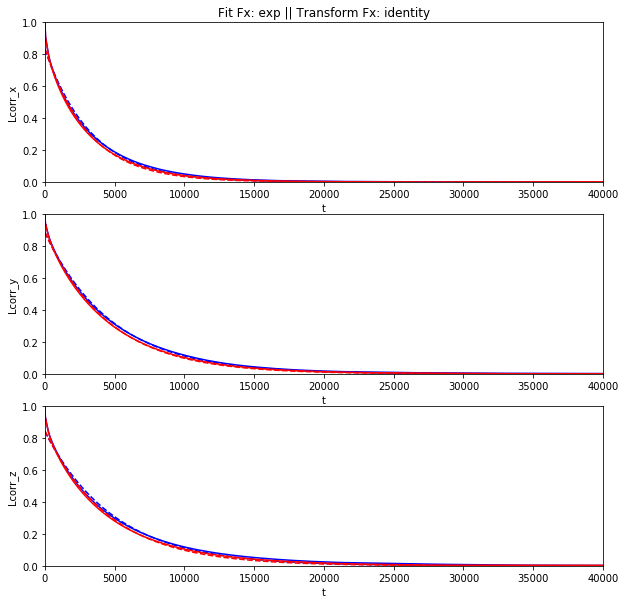

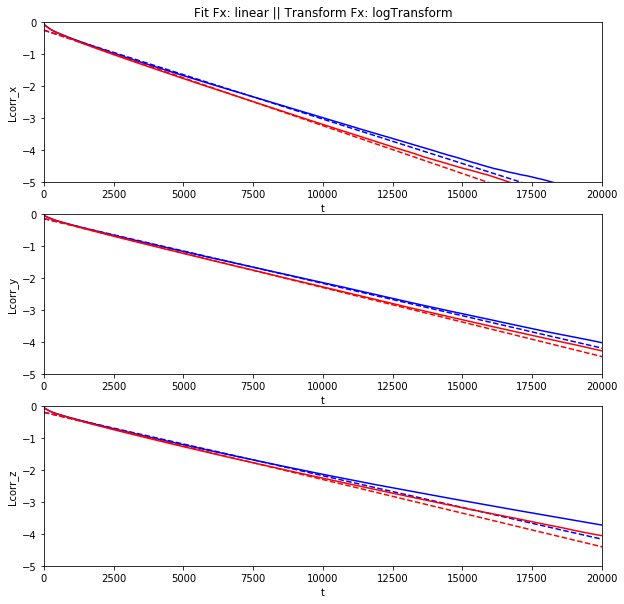

In [162]:
sysList=["MNWF", "MFWF"]
TransformRotDiff(sysList, fit_window = [0,40000],xlim = [0,40000],\
                 ylim = [0,1], transform_function=identity, fit_function=exp,fit_functionPlot=expPlot )
print("++++++++++++++++++")
TransformRotDiff(sysList, fit_window = [0,10000],xlim = [0,20000],\
                 ylim = [-5,0], transform_function=logTransform, fit_function=linear,fit_functionPlot=linearPlot)

['MNWN_TIP4P', 'MFWN_TIP4P']
Fit Function:  exp
Transform Function: identity
System: MNWN_TIP4P:: tau 2798.9104251829262
System: MFWN_TIP4P:: tau 2785.6183626230304
System: MNWN_TIP4P:: tau 3983.125798220886
System: MFWN_TIP4P:: tau 3968.587947601273
System: MNWN_TIP4P:: tau 4038.7089250959716
System: MFWN_TIP4P:: tau 3968.424948750023
++++++++++++++++++
['MNWN_TIP4P', 'MFWN_TIP4P']
Fit Function:  linear
Transform Function: logTransform
System: MNWN_TIP4P:: tau 3020.5590697897774
System: MFWN_TIP4P:: tau 2973.550734227897
System: MNWN_TIP4P:: tau 4081.509759933543
System: MFWN_TIP4P:: tau 4069.7785918663963
System: MNWN_TIP4P:: tau 4211.416322954458
System: MFWN_TIP4P:: tau 4130.342439517097


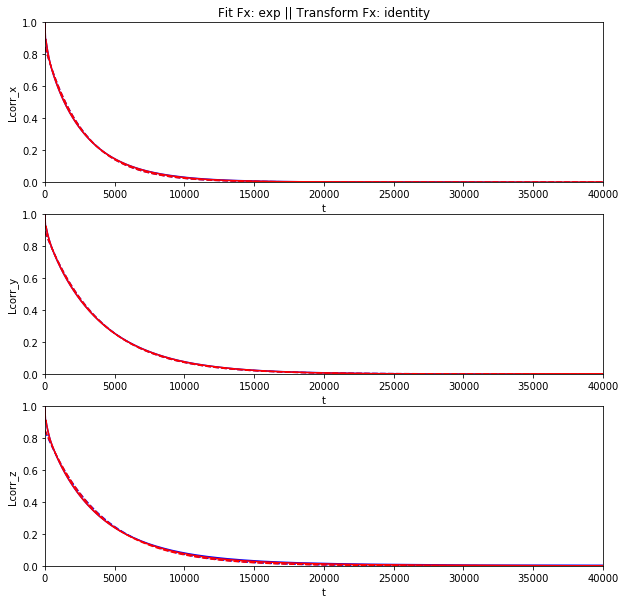

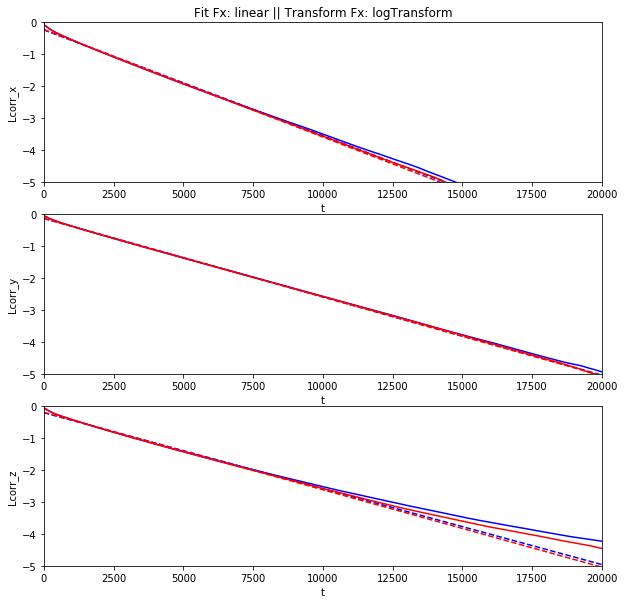

In [163]:
sysList=["MNWN_TIP4P", "MFWN_TIP4P"]
TransformRotDiff(sysList, fit_window = [0,40000],xlim = [0,40000],\
                 ylim = [0,1], transform_function=identity, fit_function=exp,fit_functionPlot=expPlot )
print("++++++++++++++++++")
TransformRotDiff(sysList, fit_window = [0,10000],xlim = [0,20000],\
                 ylim = [-5,0], transform_function=logTransform, fit_function=linear,fit_functionPlot=linearPlot )

['MNWN', 'MFWN']
Fit Function:  multiple_exp3
Transform Function: identity
System: MNWN:: tau [ 9.36566469e-01  2.58514553e+03 -9.40607888e+00 -4.09367552e+07
 -8.15284420e+01 -5.17653182e+07]
System: MFWN:: tau [ 9.44839427e-01  2.48004907e+03 -8.32404407e+01 -5.96500181e+07
 -1.34399631e+01 -5.04517506e+07]
Error
System: MFWN:: tau [ 9.29736555e-01  3.74329338e+03 -1.53649262e+02 -5.99163422e+07
  2.36770568e+01 -4.24934848e+07]
Error
Error
++++++++++++++++++


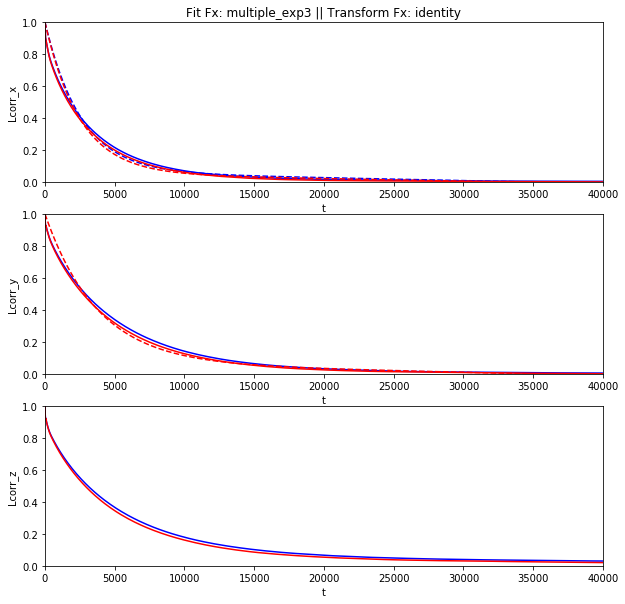

In [177]:
TransformRotDiff(["MNWN","MFWN"], fit_window = [0,40000],xlim = [0,40000],ylim = [0,1],\
                 transform_function=identity, fit_function=multiple_exp3, fit_functionPlot=multiple_exp3Plot )
print("++++++++++++++++++")

['MNWN', 'MFWN']
Fit Function:  multiple_exp2
Transform Function: identity
System: MNWN:: tau [ 9.36554505e-01  2.58508722e+03 -6.73461471e+02 -3.72975407e+08]
System: MFWN:: tau [-1.08588564e+03 -6.53096893e+08  9.44829239e-01  2.47999993e+03]
System: MNWN:: tau [ 9.22638334e-01  3.94861446e+03 -7.46580713e+02 -3.53903938e+08]
System: MFWN:: tau [ 9.29724932e-01  3.74322828e+03 -8.99024438e+02 -4.47717885e+08]
System: MNWN:: tau [-7.57053065e+02 -2.63594081e+08  8.70854373e-01  3.82671855e+03]
System: MFWN:: tau [ 8.84955867e-01  3.68009682e+03 -1.36128001e+03 -4.99114812e+08]
++++++++++++++++++


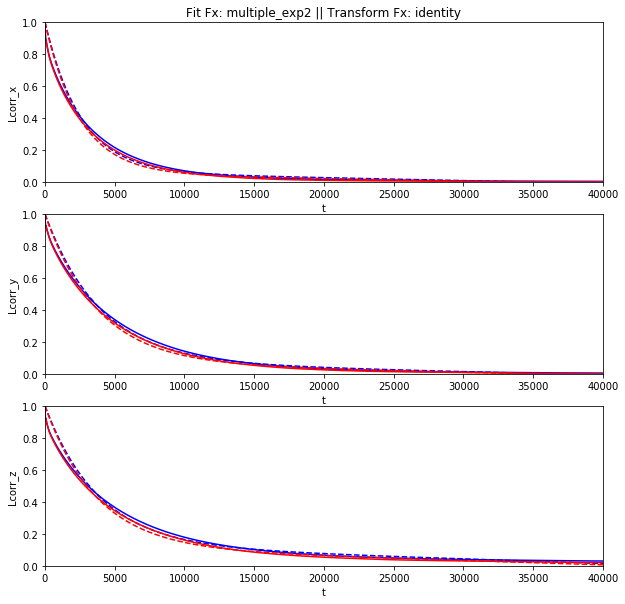

In [178]:
TransformRotDiff(["MNWN","MFWN"], fit_window = [0,40000],xlim = [0,40000],ylim = [0,1],\
                 transform_function=identity, fit_function=multiple_exp2, fit_functionPlot=multiple_exp2Plot )
print("++++++++++++++++++")